In [1]:
# with open('./GX/pcNet.py') as pcNet:
#     exec(pcNet.read())

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
sc.settings.verbosity = 0
from anndata import AnnData
import scipy
from numpy.linalg import svd


import warnings
warnings.filterwarnings("ignore")


In [3]:
try:
    from sys import path as syspath
    from os import path as ospath
    syspath.append(ospath.join(ospath.expanduser("~"), 'Downloads/Xct/GX/'))
    
    from pcNet import pcNet
    from main import *
    import dNN 
    from neighborhood import laplacian
except ImportError:
    print('Module not found')

In [4]:
ada = sc.read_h5ad("LS.h5ad")
ada

AnnData object with n_obs × n_vars = 5011 × 17328
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'

In [5]:
data = csr_matrix.toarray(ada.X)
counts = np.asarray(np.expm1(data), dtype=int)
ada.layers['raw'] = counts
ada.layers['log1p'] = data

In [6]:
#ada.X = ada.layers['log1p']

In [7]:
#sc.pp.highly_variable_genes(ada, n_top_genes=3000, flavor='seurat_v3')

In [8]:
ada.var.head()

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable
A1BG,0.207945,0.433392,0.416993,1.039327,0
A1BG-AS1,0.016780,0.034014,0.035630,0.954655,0
A2M,0.076039,0.197688,0.158364,1.248312,1
A2M-AS1,0.006253,0.015517,0.013463,1.152493,1
A2ML1,0.001538,0.004003,0.003239,1.236025,1


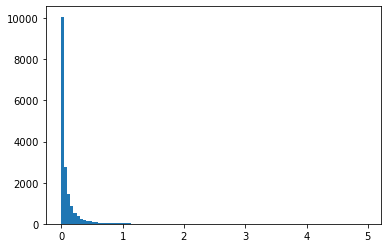

In [9]:
plt.hist(ada.var['vst.mean'], bins=100, density=False)
plt.show()

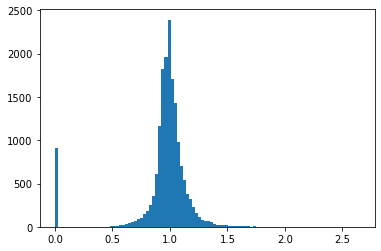

In [10]:
plt.hist(ada.var['vst.variance.standardized'], bins=100, density=False)
plt.show()

### HVG: Seurat v3

In [11]:
HVG_i = np.argsort(np.asarray(ada.var['vst.variance.standardized']))[-3000:]
ada = ada[:, HVG_i].copy()
ada

AnnData object with n_obs × n_vars = 5011 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'raw', 'log1p'

In [12]:
ada.var.head()

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable
FAM89A,0.017362,0.039930,0.036858,1.083349,1
BCL2L15,0.002309,0.005352,0.004940,1.083378,1
NABP1,0.430442,0.881347,0.813464,1.083449,1
SPTBN1,0.480740,0.971483,0.896650,1.083459,1
SNHG9,0.199078,0.433404,0.400012,1.083478,1


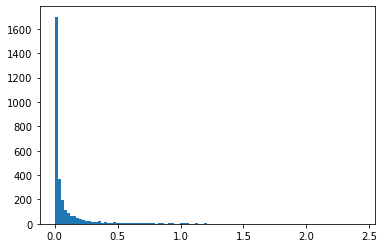

In [13]:
plt.hist(ada.var['vst.mean'], bins=100, density=False)
plt.show()

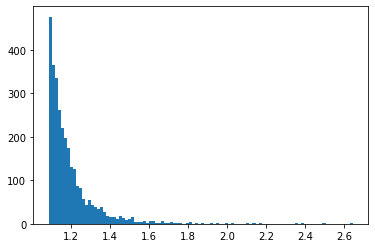

In [14]:
plt.hist(ada.var['vst.variance.standardized'], bins=100, density=False)
plt.show()

### Xct object

In [15]:
skin = Xct_metrics(ada)
type(skin)

main.Xct_metrics

918 (intervals for fit) / 3000 (filtered -Inf) / 3000 (original) features for the fit


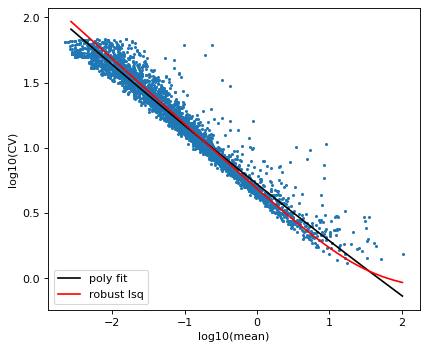

array([ 0.048889  , -0.07626458, -0.02784309, ...,  0.78019458,
        0.59314723,  0.22144539])

In [16]:
skin.chen2016_fit(ada, plot = True, verbose = True)

In [17]:
obj1 = Xct(ada, 'Inflam. FIB', 'Inflam. DC')
df1 = obj1.fill_metric()
df1

,pathway_name,lig_A,lig_B,rec_A,rec_B,rec_C,mean_L1,mean_L2,mean_R1,mean_R2,...,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
93,GDF,GDF10,None,ACVR1B,ACVR2A,None,0.003259,None,0.030193,0.094221,...,0.003259,0.053336,0.005131,0.113562,1.574316,2.129173,21.977261,6.318210,-0.283582,0.110906
121,ACTIVIN,INHBA,None,ACVR1B,ACVR2A,None,0.045545,None,0.030193,0.094221,...,0.045545,0.053336,0.083606,0.113562,1.835688,2.129173,6.348628,6.318210,-0.146218,0.110906
645,CCL,CCL19,None,CCR7,None,None,1.738264,None,1.688513,None,...,1.738264,1.688513,5.539186,1.941579,3.186619,1.149875,1.353964,0.825226,0.660159,-0.005376
646,CCL,CCL21,None,CCR7,None,None,0.050827,None,1.688513,None,...,0.050827,1.688513,0.100430,1.941579,1.975929,1.149875,6.235041,0.825226,-0.063040,-0.005376
711,CXCL,CXCL12,None,CXCR4,None,None,1.425765,None,1.356051,None,...,1.425765,1.356051,2.725718,1.514930,1.911759,1.117163,1.157958,0.907654,0.295925,-0.035804
806,TNF,TNF,None,TNFRSF1B,None,None,0.003117,None,0.372519,None,...,0.003117,0.372519,0.004694,0.689931,1.505644,1.852069,21.977261,2.229741,-0.283582,0.107562
825,CD137,TNFSF9,None,TNFRSF9,None,None,0.005808,None,0.350037,None,...,0.005808,0.350037,0.009628,0.498938,1.657859,1.425388,16.895406,2.017947,-0.160756,-0.155219
1037,NT,BDNF,None,NTRK2,None,None,0.009386,None,0.024446,None,...,0.009386,0.024446,0.016305,0.027285,1.737234,1.116142,13.604940,6.757026,-0.094830,-0.338065
1572,LAMININ,LAMB1,None,SV2B,None,None,0.192922,None,0.015761,None,...,0.192922,0.015761,0.356617,0.019873,1.848509,1.260899,3.095425,8.944272,-0.019347,-0.338065
1573,LAMININ,LAMB2,None,SV2B,None,None,1.027162,None,0.015761,None,...,1.027162,0.015761,1.343443,0.019873,1.307918,1.260899,1.128420,8.944272,-0.030466,-0.338065


In [18]:
candidates = [a+'_'+b for a, b in zip(np.asarray(df1['lig_A'],dtype=str), np.asarray(df1['rec_A'],dtype=str))]
candidates

['GDF10_ACVR1B',
 'INHBA_ACVR1B',
 'CCL19_CCR7',
 'CCL21_CCR7',
 'CXCL12_CXCR4',
 'TNF_TNFRSF1B',
 'TNFSF9_TNFRSF9',
 'BDNF_NTRK2',
 'LAMB1_SV2B',
 'LAMB2_SV2B',
 'LAMC3_SV2B',
 'SEMA6A_PLXNA4']

In [19]:
dir(obj1) #check attributes

['DB',
 'Xct_DB',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_genes_index_DB',
 '_metric_A',
 '_metric_B',
 '_metric_names',
 'chen2016_fit',
 'fill_metric',
 'genes',
 'genes_index',
 'get_index',
 'get_metric',
 'ref',
 'score',
 'subset']

In [20]:
obj1.score(method=0)

93      0.004813
121     0.063298
645     0.987901
646     0.704789
711     0.981747
806     0.031293
825     0.053526
1037    0.006342
1572    0.077990
1573    0.310516
1577    0.130846
1991    0.016351
dtype: float64

In [21]:
np.random.seed(1)

orig_score0 = np.asarray(obj1.score(method=0))
pmt_scores0 = scores(ada, obj1, n=10)
#pmt_scores0.shape
enriched, pvals, counts = pmt_test(orig_score0, pmt_scores0)
enriched, counts

([2, 3, 4], [0, 4, 10, 10, 10, 0, 9, 0, 5, 5, 6, 6])

In [22]:
df_enriched = df1.iloc[enriched, :]
df_enriched

,pathway_name,lig_A,lig_B,rec_A,rec_B,rec_C,mean_L1,mean_L2,mean_R1,mean_R2,...,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
645,CCL,CCL19,None,CCR7,None,None,1.738264,None,1.688513,None,...,1.738264,1.688513,5.539186,1.941579,3.186619,1.149875,1.353964,0.825226,0.660159,-0.005376
646,CCL,CCL21,None,CCR7,None,None,0.050827,None,1.688513,None,...,0.050827,1.688513,0.100430,1.941579,1.975929,1.149875,6.235041,0.825226,-0.063040,-0.005376
711,CXCL,CXCL12,None,CXCR4,None,None,1.425765,None,1.356051,None,...,1.425765,1.356051,2.725718,1.514930,1.911759,1.117163,1.157958,0.907654,0.295925,-0.035804


In [23]:
ada.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,patient.id,condition,labels,ident
S1_AACTCCCAGAGCTGCA,0,3783.124441,4064,Patient1,LS,3,Inflam. FIB
S1_CAACCAATCCTCATTA,0,3658.170945,3440,Patient1,LS,1,FBN1+ FIB
S1_CGCTATCTCCTAGTGA,0,3769.209331,3436,Patient1,LS,3,Inflam. FIB
S1_ATTTCTGCAGGACGTA,0,3363.208381,2778,Patient1,LS,3,Inflam. FIB
S1_TGAGCCGAGCTGGAAC,0,3191.772156,2645,Patient1,LS,3,Inflam. FIB


In [24]:
CellA = 'Inflam. FIB' 
CellB = 'Inflam. DC'
ada_A = ada[ada.obs['ident'] == CellA, :].copy()
ada_B = ada[ada.obs['ident'] == CellB, :].copy()
ada_A, ada_B

(AnnData object with n_obs × n_vars = 484 × 3000
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
     var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
     layers: 'raw', 'log1p',
 AnnData object with n_obs × n_vars = 81 × 3000
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
     var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
     layers: 'raw', 'log1p')

### w

In [25]:
# net_A = pcNet(ada_A.X, nComp=5, symmetric=True)
# net_B = pcNet(ada_B.X, nComp=5, symmetric=True)
# net_A.shape, net_B.shape

In [26]:
# np.savetxt("net_A.csv", net_A, delimiter="\t")
# np.savetxt("net_B.csv", net_B, delimiter="\t")
net_A = np.genfromtxt('./GX/net_A.csv', delimiter="\t")
net_B = np.genfromtxt('./GX/net_B.csv', delimiter="\t")
net_A.shape, net_B.shape

((3000, 3000), (3000, 3000))

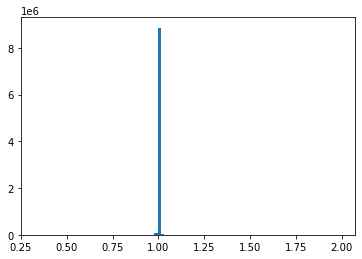

In [27]:
plt.hist(np.ravel(net_A+1), bins=100)
plt.show()

In [28]:
obj1._metric_A.shape, obj1._metric_B.shape

((5, 3000), (5, 3000))

use all the gene pairs for scores:

In [29]:
# u^2 + var
metric_A_temp = (np.square(obj1._metric_A[0]) + obj1._metric_A[1])[:, None] 
metric_B_temp = (np.square(obj1._metric_B[0]) + obj1._metric_B[1])[None, :] 
print(metric_A_temp.shape, metric_B_temp.shape)

w12 = metric_A_temp@metric_B_temp
w12.shape

(3000, 1) (1, 3000)


(3000, 3000)

only fill LR scores that both in DB and expressed:

In [30]:
# ada.var index of LR genes (the intersect of DB and object genes, no pair relationship maintained)
lig_idx = np.ravel(np.asarray(skin._genes_index_DB[:, :2]))
lig_idx = list(np.unique(lig_idx[lig_idx != 0]) - 1)

rec_idx = np.ravel(np.asarray(skin._genes_index_DB[:, 2:]))
rec_idx = list(np.unique(rec_idx[rec_idx != 0]) - 1)
len(lig_idx), len(rec_idx)

(151, 117)

In [31]:
# reverse select and zeros LR not in idx list
mask_lig = np.ones(w12.shape[0], dtype=np.bool)
mask_lig[lig_idx] = 0
mask_rec = np.ones(w12.shape[1], dtype=np.bool)
mask_rec[rec_idx] = 0

w12[mask_lig, :] = 0
w12[:, mask_rec] = 0 
w12
assert np.count_nonzero(w12) == len(lig_idx)*len(rec_idx)

In [32]:
w12

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

QC for w12:

In [33]:
w12.shape[0] * w12.shape[1] - np.count_nonzero(w12) #zeros

8982333

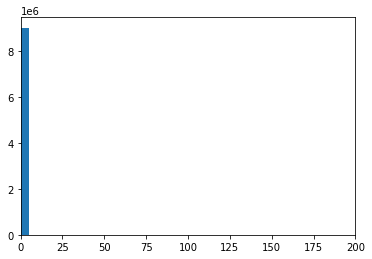

In [34]:
plt.hist(np.ravel(w12), bins=100)
plt.xlim(0,200)
plt.show()

In [35]:
# w = np.block([[net_A+1, w12],
#             [w12.T, net_B+1]])
# w.shape

#### scale w:

In [36]:
np.mean(net_A+1), np.mean(net_B+1)

(1.000280248061708, 1.0001537102336429)

In [ ]:
#1
num = 0.1 * (np.sum(abs(net_A+1)) + np.sum(abs(net_B+1))) / (len(net_A) + len(net_B))
w12_scale = w12*num
num

In [37]:
#2
mu = 1
w12_scale = mu * ((net_A+1).sum() + (net_B+1).sum()) / (2 * w12.sum()) * w12

In [38]:
np.mean(w12_scale)

1.0002169791476754

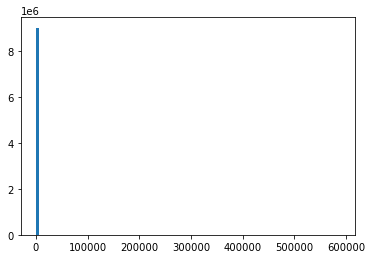

In [39]:
plt.hist(np.ravel(w12_scale), bins=100)
#plt.xlim(0,4000)
plt.show()

In [40]:
w = np.block([[net_A +1, w12_scale],
            [w12_scale.T, net_B +1]])
w.shape

(6000, 6000)

### eigen

In [41]:
# w_test = np.array([[1, 0, 3, 2], [1, 1, 0, 0], [5, 0, 2, 1], [1, 0, 0, 1]])
# w_test = (w_test + w_test.T)//2
# w_test

In [42]:
def Manifold_Align(w, d = 3):
    
    def is_symmetric(a, rtol=1e-05, atol=1e-08):
        return np.allclose(a, a.T, rtol=rtol, atol=atol)
    
    if not is_symmetric(w):
        raise ValueError('Input should be a symmetric matrix')
    else:
        L = laplacian(w, normed=False)
        U, s, VT = svd(L, full_matrices=True) 
        #print ('U:', U.shape, 's:', s.shape, 'VT:', VT.shape)
        V = VT.T
        V = V[:, s > 1e-4]
        #print('V:', V.shape)
        V = V[:, :d]
    
        return V


In [43]:
np.random.seed(42)

MA = Manifold_Align(w, d=3)
MA.shape

(6000, 3)

In [44]:
def pair_distance(ma, genelist1, genelist2):
    d = {}
    for i, l in enumerate(genelist1):
        for j, r in enumerate(genelist2):
            d[f'{l}_{r}'] = [(i, j), np.linalg.norm(ma[i, :] - ma[len(genelist1) + j, :])]
    
    return d

In [45]:
result_eig = pair_distance(MA, list(ada_A.var_names.astype(str)), list(ada_B.var_names.astype(str)))
len(result_eig)

9000000

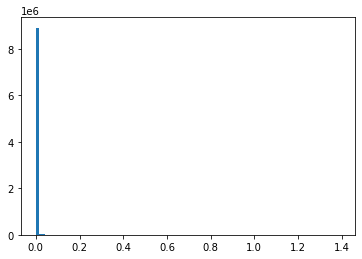

In [46]:
plt.hist(np.asarray(list(result_eig.values()))[:, 1], bins=100)
plt.show()

In [47]:
#pd.DataFrame.from_dict(result_eig, orient='index').to_csv('distances_eig.csv', header=None)

In [48]:
df_eig = pd.DataFrame.from_dict(result_eig, orient='index', columns=['idx', 'dist']).sort_values(by=['dist'])
df_eig['rank'] = np.arange(len(df_eig))
#df_eig.head()

In [49]:
correspondence_score = [w12[idx] for idx in np.asarray(df_eig['idx'])]
#np.count_nonzero(np.asarray(correspondence_score))
df_eig['correspondence_score'] = correspondence_score
df_eig.head()

,idx,dist,rank,correspondence_score
CXCL14_MMP12,"(2994, 2995)",0.000002,0,0.0
CXCL14_C15orf48,"(2994, 2940)",0.000002,1,0.0
CXCL14_LYZ,"(2994, 2957)",0.000002,2,0.0
CXCL14_LIPA,"(2994, 1561)",0.000002,3,0.0
CXCL14_TACSTD2,"(2994, 2848)",0.000002,4,0.0


[[1.         0.26641583]
 [0.26641583 1.        ]]


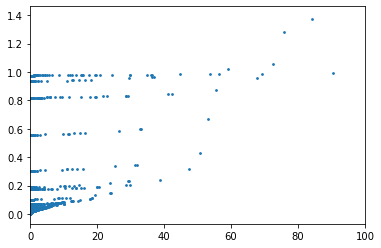

In [50]:
#check corr
select = df_eig['correspondence_score'] != 0
nX = np.asarray(df_eig['correspondence_score'][select])
nY = np.asarray(df_eig['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [51]:
df_eig.loc['CCL19_CCR7']

idx                     (2993, 2138)
dist                        0.846077
rank                         8993995
correspondence_score       41.028714
Name: CCL19_CCR7, dtype: object

In [52]:
np.percentile(np.asarray(df_eig['dist']), 95)

2.6251862922662992e-06

In [53]:
for p in candidates:
    print(p, "dist, rank, score, rank%:", df_eig.loc[p].values, f'{round(100 * df_eig.loc[p].values[1]/len(df_eig),5)}%')

GDF10_ACVR1B dist, rank, score, rank%: [(229, 344) 0.0015068934353678872 8832584 0.0003796808297849064] 0.0%
INHBA_ACVR1B dist, rank, score, rank%: [(2173, 344) 0.00171945535199114 8835596 0.006326531634893053] 0.0%
CCL19_CCR7 dist, rank, score, rank%: [(2993, 2138) 0.8460765387720315 8993995 41.0287141932314] 1e-05%
CCL21_CCR7 dist, rank, score, rank%: [(2306, 2138) 0.8187957366721874 8993956 0.49370806176399123] 1e-05%
CXCL12_CXCR4 dist, rank, score, rank%: [(2919, 2548) 0.18450768955790275 8982001 15.959156272693798] 0.0%
TNF_TNFRSF1B dist, rank, score, rank%: [(2815, 703) 0.019549467071929158 8928031 0.003897567340864221] 0.0%
TNFSF9_TNFRSF9 dist, rank, score, rank%: [(798, 728) 0.014049774289165253 8916119 0.006004715512835695] 0.0%
BDNF_NTRK2 dist, rank, score, rank%: [(1193, 57) 0.0005953610877990283 8785066 0.00045708881868263294] 0.0%
LAMB1_SV2B dist, rank, score, rank%: [(1590, 35) 0.002536732430131708 8847518 0.007924666795741999] 0.0%
LAMB2_SV2B dist, rank, score, rank%: [(

### NN

In [54]:
x1_np = scipy.sparse.csr_matrix.toarray(ada_A.X.T) #gene by cell
x2_np = scipy.sparse.csr_matrix.toarray(ada_B.X.T)

In [55]:
n = 3000
lr = 0.001

projections, losses = dNN.train_and_project(x1_np, x2_np, w=w, n=n, lr=lr)

Net(
  (linear1): Linear(in_features=484, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=81, out_features=48, bias=True)
  (linear2): Linear(in_features=48, out_features=12, bias=True)
  (linear3): Linear(in_features=12, out_features=2, bias=True)
)
0 4485.830078125
1 1310.50048828125
2 1243.060791015625
3 773.0245361328125
4 698.214599609375
5 690.107666015625
6 644.24169921875
7 568.7178344726562
8 494.2179870605469
9 450.0582275390625
10 449.2413635253906
11 477.13433837890625
12 499.98822021484375
13 496.75323486328125
14 474.89520263671875
15 453.1240234375
16 442.332763671875
17 442.07952880859375
18 446.03656005859375
19 447.8030090332031
20 443.8348083496094
21 434.0309753417969
22 420.9064025878906
23 408.2215576171875
24 399.33209228515625
25 395.7428894042969
26 396.342041015625
27 398.005126953125
28 397.7089538574219
29 394.42

354 118.91789245605469
355 116.36726379394531
356 116.00460052490234
357 99.7821044921875
358 101.77378845214844
359 112.40184783935547
360 102.01324462890625
361 98.30512237548828
362 104.89251708984375
363 102.29861450195312
364 97.5333251953125
365 97.59037017822266
366 101.12437438964844
367 103.36915588378906
368 99.10821533203125
369 96.35981750488281
370 96.98785400390625
371 98.86639404296875
372 99.5969009399414
373 97.07308197021484
374 95.65116119384766
375 96.39599609375
376 97.48858642578125
377 97.66960144042969
378 96.20838928222656
379 95.15764617919922
380 95.04623413085938
381 95.67427062988281
382 96.72177124023438
383 97.408203125
384 98.57669830322266
385 98.52371215820312
386 99.12495422363281
387 97.71536254882812
388 96.60897827148438
389 94.96704864501953
390 94.16156005859375
391 94.25860595703125
392 94.91897583007812
393 95.85564422607422
394 96.3106918334961
395 97.2830581665039
396 97.47159576416016
397 98.90550231933594
398 98.94441986083984
399 100.52283

729 83.88929748535156
730 83.5521011352539
731 83.18507385253906
732 82.9500732421875
733 82.79450988769531
734 82.71461486816406
735 82.70097351074219
736 82.72886657714844
737 82.80121612548828
738 82.92871856689453
739 83.17994689941406
740 83.57907104492188
741 84.50239562988281
742 85.75465393066406
743 88.99295806884766
744 91.61824035644531
745 99.41535186767578
746 96.93815612792969
747 97.26106262207031
748 86.44464111328125
749 83.66293334960938
750 88.55810546875
751 89.45472717285156
752 87.18162536621094
753 83.15988159179688
754 84.06954193115234
755 87.95011901855469
756 88.12691497802734
757 86.95954895019531
758 83.59002685546875
759 82.85853576660156
760 84.5631103515625
761 85.40693664550781
762 84.8805923461914
763 83.04662322998047
764 82.6044921875
765 83.57640838623047
766 84.40069580078125
767 84.68719482421875
768 83.64773559570312
769 82.75862884521484
770 82.35939025878906
771 82.60713195800781
772 83.19019317626953
773 83.54566192626953
774 83.78907775878906

1101 79.767578125
1102 79.66014099121094
1103 79.4363784790039
1104 78.89978790283203
1105 78.50399780273438
1106 78.32745361328125
1107 78.36663818359375
1108 78.57362365722656
1109 78.76747131347656
1110 79.00269317626953
1111 79.06492614746094
1112 79.16841125488281
1113 79.08523559570312
1114 79.06573486328125
1115 78.86697387695312
1116 78.73836517333984
1117 78.53352355957031
1118 78.37458038330078
1119 78.2422866821289
1120 78.16426086425781
1121 78.1046142578125
1122 78.05736541748047
1123 78.04341125488281
1124 78.01367950439453
1125 78.00066375732422
1126 77.9927978515625
1127 77.97296142578125
1128 77.96810150146484
1129 77.9548568725586
1130 77.96026611328125
1131 78.00120544433594
1132 78.0991439819336
1133 78.34220886230469
1134 78.8829574584961
1135 80.39582061767578
1136 83.25310516357422
1137 92.1588363647461
1138 100.20796203613281
1139 127.16722106933594
1140 97.83262634277344
1141 81.86309814453125
1142 86.27131652832031
1143 90.5879135131836
1144 83.59762573242188


1462 76.52397155761719
1463 75.79224395751953
1464 74.9902114868164
1465 74.69258880615234
1466 74.87866973876953
1467 75.30386352539062
1468 75.79612731933594
1469 75.92855834960938
1470 76.06477355957031
1471 75.77959442138672
1472 75.59443664550781
1473 75.21357727050781
1474 74.92880249023438
1475 74.70223236083984
1476 74.57850646972656
1477 74.53422546386719
1478 74.57264709472656
1479 74.6590805053711
1480 74.79608154296875
1481 75.01193237304688
1482 75.29153442382812
1483 75.82630157470703
1484 76.35230255126953
1485 77.531982421875
1486 78.23432159423828
1487 80.18624877929688
1488 80.10893249511719
1489 81.44001770019531
1490 79.22695922851562
1491 77.79640197753906
1492 75.4999008178711
1493 74.51812744140625
1494 74.86033630371094
1495 75.99931335449219
1496 77.69131469726562
1497 78.32135772705078
1498 79.58502197265625
1499 78.31809997558594
1500 77.37165832519531
1501 75.41996765136719
1502 74.47921752929688
1503 74.76142883300781
1504 75.72721862792969
1505 76.91209411

1823 74.01521301269531
1824 73.2689437866211
1825 72.46539306640625
1826 72.07410430908203
1827 72.03709411621094
1828 72.25733947753906
1829 72.72018432617188
1830 73.26714324951172
1831 74.24744415283203
1832 74.92740631103516
1833 76.41104888916016
1834 76.21270751953125
1835 76.57780456542969
1836 74.76971435546875
1837 73.4322280883789
1838 72.25635528564453
1839 71.98005676269531
1840 72.4582290649414
1841 73.3438720703125
1842 74.81068420410156
1843 75.7241439819336
1844 77.64060974121094
1845 76.85029602050781
1846 76.43241882324219
1847 73.79961395263672
1848 72.2315902709961
1849 72.15725708007812
1850 73.2645034790039
1851 74.96318054199219
1852 75.53558349609375
1853 76.45704650878906
1854 75.13639831542969
1855 74.06383514404297
1856 72.49578857421875
1857 71.90943908691406
1858 72.3819580078125
1859 73.27899932861328
1860 74.26441955566406
1861 74.22502136230469
1862 74.21454620361328
1863 73.30021667480469
1864 72.56926727294922
1865 71.94835662841797
1866 71.81756591796

2183 70.38841247558594
2184 71.2380142211914
2185 71.7872543334961
2186 72.87228393554688
2187 72.80767059326172
2188 73.31735229492188
2189 72.20491027832031
2190 71.4306640625
2191 70.21068572998047
2192 69.51560974121094
2193 69.32544708251953
2194 69.60881805419922
2195 70.22742462158203
2196 70.93880462646484
2197 72.17841339111328
2198 72.81735229492188
2199 74.29973602294922
2200 73.5096435546875
2201 73.04694366455078
2202 70.95782470703125
2203 69.63614654541016
2204 69.27848815917969
2205 69.8629379272461
2206 71.13108825683594
2207 72.2651138305664
2208 74.25215148925781
2209 74.19873809814453
2210 74.69502258300781
2211 72.05766296386719
2212 70.09071350097656
2213 69.2697525024414
2214 70.08660888671875
2215 71.80560302734375
2216 72.70832061767578
2217 73.96224975585938
2218 72.77947998046875
2219 71.78551483154297
2220 69.93665313720703
2221 69.1640396118164
2222 69.64547729492188
2223 70.67411041259766
2224 71.83261108398438
2225 71.73042297363281
2226 71.66033172607422

2544 67.9859619140625
2545 66.41144561767578
2546 66.4728775024414
2547 67.82745361328125
2548 68.87933349609375
2549 69.95890045166016
2550 69.04324340820312
2551 68.26399230957031
2552 66.79805755615234
2553 66.16171264648438
2554 66.47911071777344
2555 67.2704849243164
2556 68.18516540527344
2557 68.18824005126953
2558 68.16409301757812
2559 67.31009674072266
2560 66.62124633789062
2561 66.08363342285156
2562 66.02385711669922
2563 66.39517211914062
2564 66.88668060302734
2565 67.48587036132812
2566 67.65778350830078
2567 68.00045013427734
2568 67.60995483398438
2569 67.21505737304688
2570 66.44945526123047
2571 65.96036529541016
2572 65.84619140625
2573 66.05683135986328
2574 66.4874267578125
2575 66.98295593261719
2576 67.80170440673828
2577 68.20537567138672
2578 68.90266418457031
2579 68.33600616455078
2580 68.01103210449219
2581 67.04258728027344
2582 66.4305191040039
2583 65.95722198486328
2584 65.75318908691406
2585 65.76457977294922
2586 65.94265747070312
2587 66.23889923095

2905 64.20401763916016
2906 63.966102600097656
2907 63.94394302368164
2908 64.09674072265625
2909 64.2675552368164
2910 64.43463897705078
2911 64.45867919921875
2912 64.45880889892578
2913 64.351318359375
2914 64.2452163696289
2915 64.10408020019531
2916 63.97597885131836
2917 63.874881744384766
2918 63.819061279296875
2919 63.80501174926758
2920 63.80552291870117
2921 63.81730270385742
2922 63.85504913330078
2923 63.919464111328125
2924 63.98963165283203
2925 64.131591796875
2926 64.31421661376953
2927 64.67911529541016
2928 65.14608001708984
2929 66.24838256835938
2930 67.24420166015625
2931 69.84933471679688
2932 70.49934387207031
2933 73.25878143310547
2934 70.10800170898438
2935 67.8426284790039
2936 64.57890319824219
2937 64.05377960205078
2938 65.92830657958984
2939 67.9361801147461
2940 70.44705200195312
2941 68.61738586425781
2942 66.81026458740234
2943 64.30612182617188
2944 64.34402465820312
2945 66.3060073852539
2946 67.18603515625
2947 67.53946685791016
2948 65.64901733398

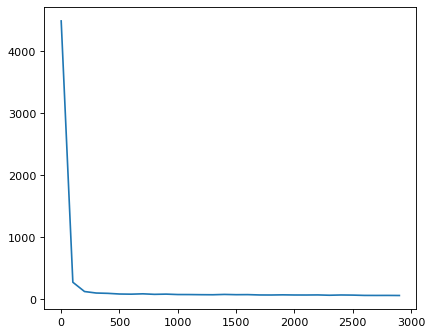

In [56]:
plt.figure(figsize=(6, 5), dpi=80)

plt.plot(np.arange(len(losses))*100, losses)
#plt.savefig('fig.png', dpi=80)
plt.show()

In [58]:
df_proj = pd.DataFrame(projections)

df_proj.index = list(ada_A.var_names) + list(ada_B.var_names)
df_proj.head()

,0,1
FAM89A,-0.005370,0.017305
BCL2L15,-0.005200,0.017625
NABP1,-0.005031,0.017747
SPTBN1,-0.005264,0.017737
SNHG9,-0.005167,0.017505


In [59]:
result_nn = pair_distance(projections, list(ada_A.var_names.astype(str)), list(ada_B.var_names.astype(str)))
len(result_nn)

9000000

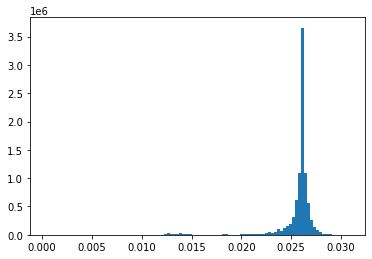

In [60]:
plt.hist(np.asarray(list(result_nn.values()))[:, 1], bins=100)
plt.show()

In [61]:
#pd.DataFrame.from_dict(result_nn, orient='index').to_csv('distances_nn.csv', header=None)

In [62]:
df_nn = pd.DataFrame.from_dict(result_nn, orient='index', columns=['idx', 'dist']).sort_values(by=['dist'])
df_nn['rank'] = np.arange(len(df_nn))
df_nn.head(10)

,idx,dist,rank
COL6A1_CD74,"(2950, 2991)",0.000348,0
COL6A1_CCR7,"(2950, 2138)",0.000366,1
COL6A2_CD74,"(2976, 2991)",0.000377,2
COL1A1_CD74,"(2985, 2991)",0.000383,3
COL6A1_CXCR4,"(2950, 2548)",0.000387,4
COL1A2_CD74,"(2981, 2991)",0.000391,5
COL6A2_CCR7,"(2976, 2138)",0.000394,6
COL1A1_CCR7,"(2985, 2138)",0.000401,7
COL6A3_CD74,"(2819, 2991)",0.000402,8
COL1A2_CCR7,"(2981, 2138)",0.000409,9


In [63]:
correspondence_score = [w12[idx] for idx in np.asarray(df_nn['idx'])]
#np.count_nonzero(np.asarray(correspondence_score))
df_nn['correspondence_score'] = correspondence_score
df_nn.head()

,idx,dist,rank,correspondence_score
COL6A1_CD74,"(2950, 2991)",0.000348,0,436.493875
COL6A1_CCR7,"(2950, 2138)",0.000366,1,72.624458
COL6A2_CD74,"(2976, 2991)",0.000377,2,506.582093
COL1A1_CD74,"(2985, 2991)",0.000383,3,406.969673
COL6A1_CXCR4,"(2950, 2548)",0.000387,4,50.821160


[[ 1.         -0.13979145]
 [-0.13979145  1.        ]]


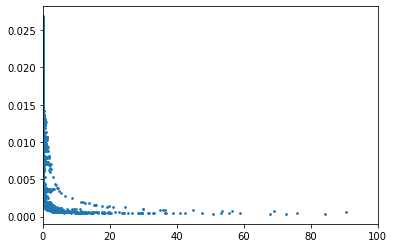

In [65]:
select = df_nn['correspondence_score'] != 0
nX = np.asarray(df_nn['correspondence_score'][select])
nY = np.asarray(df_nn['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [66]:
df_nn.loc['CCL19_CCR7']

idx                     (2993, 2138)
dist                         0.00046
rank                              26
correspondence_score       41.028714
Name: CCL19_CCR7, dtype: object

In [67]:
np.percentile(np.asarray(df_nn['dist']), 5)

0.023359721526503563

In [68]:
for p in candidates:
    print(p, "dist, rank, score, rank%:", df_nn.loc[p].values, f'{round(100 * df_nn.loc[p].values[1]/len(df_nn),5)}%')

GDF10_ACVR1B dist, rank, score, rank%: [(229, 344) 0.024397794157266617 740116 0.0003796808297849064] 0.0%
INHBA_ACVR1B dist, rank, score, rank%: [(2173, 344) 0.01661517284810543 173666 0.006326531634893053] 0.0%
CCL19_CCR7 dist, rank, score, rank%: [(2993, 2138) 0.00046016977285034955 26 41.0287141932314] 0.0%
CCL21_CCR7 dist, rank, score, rank%: [(2306, 2138) 0.005257319658994675 689 0.49370806176399123] 0.0%
CXCL12_CXCR4 dist, rank, score, rank%: [(2919, 2548) 0.0005623729666694999 92 15.959156272693798] 0.0%
TNF_TNFRSF1B dist, rank, score, rank%: [(2815, 703) 0.014131731353700161 130075 0.003897567340864221] 0.0%
TNFSF9_TNFRSF9 dist, rank, score, rank%: [(798, 728) 0.013957245275378227 110269 0.006004715512835695] 0.0%
BDNF_NTRK2 dist, rank, score, rank%: [(1193, 57) 0.024884667247533798 984827 0.00045708881868263294] 0.0%
LAMB1_SV2B dist, rank, score, rank%: [(1590, 35) 0.011693866923451424 8956 0.007924666795741999] 0.0%
LAMB2_SV2B dist, rank, score, rank%: [(674, 35) 0.010457968